<a href="https://colab.research.google.com/github/Iamjohnko/Data-science-Project-Portfolio/blob/main/DETERMINING_THE_ELASTICITY_OF_PRODUCT_DEMAND_AND_PRICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving Senior Data Assignment (2).csv to Senior Data Assignment (2).csv


{'Senior Data Assignment (2).csv': b'date_week,sku_cde,cost_price,regular_price,regular_volume,promo_price,promo_volume\r\n2020-02-09,62875832,68.0,140.0,10.0,,0.0\r\n2020-02-09,84630314,180.0,300.0,10.0,,0.0\r\n2020-02-09,95208654,26.0,56.0,40.0,,0.0\r\n2020-02-09,111708109,80.0,,0.0,109.95,10.0\r\n2020-02-16,73267284,94.0,205.0,20.0,,0.0\r\n2020-02-16,95208654,26.0,56.0,200.0,,0.0\r\n2020-02-16,62875832,68.0,140.0,50.0,,0.0\r\n2020-02-16,84630314,180.0,300.0,290.0,,0.0\r\n2020-02-16,11990782,52.0,,0.0,149.95,150.0\r\n2020-02-16,111708109,80.0,,0.0,109.95,480.0\r\n2020-02-16,12062063,50.0,,0.0,169.95,350.0\r\n2020-02-23,11990782,52.0,,0.0,149.95,280.0\r\n2020-02-23,111708109,80.0,135.0,190.0,109.95,80.0\r\n2020-02-23,95208654,26.0,56.0,160.0,,0.0\r\n2020-02-23,73267284,94.0,205.0,40.0,,0.0\r\n2020-02-23,12062063,58.0,,0.0,149.95,470.0\r\n2020-02-23,84630314,180.0,300.0,300.0,,0.0\r\n2020-02-23,62875832,68.0,140.0,100.0,,0.0\r\n2020-03-01,95208654,26.0,56.0,140.0,,0.0\r\n2020-03-01,732

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('Senior Data Assignment (2).csv')
df.head()

date_week    sku_cde  cost_price  regular_price  regular_volume  promo_price  promo_volume
0  2020-02-09   62875832        68.0          140.0            10.0          NaN           0.0
1  2020-02-09   84630314       180.0          300.0            10.0          NaN           0.0
2  2020-02-09   95208654        26.0           56.0            40.0          NaN           0.0
3  2020-02-09  111708109        80.0            NaN             0.0       109.95          10.0
4  2020-02-16   73267284        94.0          205.0            20.0          NaN           0.0

In [ ]:
data=df

**To advise business based on elasticities of the items (sku_cde)**

In [ ]:
#load all the libraries...
import pandas as pd
import numpy as np
import re
from IPython.display import display, HTML, Image

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")

In [ ]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pd.options.display.width = 0
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',500)

In [ ]:
#checking Null values
temp_df = pd.DataFrame((df.isnull().sum()/df.shape[0])*100,columns=['Null value%'])
temp_df['data'] = df.dtypes
temp_df.T

date_week sku_cde cost_price regular_price regular_volume  \
Null value%       0.0     0.0        0.0     19.506463            0.0   
data           object   int64    float64       float64        float64   

            promo_price promo_volume  
Null value%   70.975323          0.0  
data            float64      float64

**Data Cleaning**

In [ ]:
df.describe()

sku_cde  cost_price  regular_price  regular_volume  promo_price  \
count  8.510000e+02  851.000000     685.000000      851.000000   247.000000   
mean   7.545326e+07   94.408931     184.426277      109.388954   152.039271   
std    4.223877e+07   42.363465      71.458772      111.862743    58.689836   
min    1.199078e+07   14.000000      50.000000        0.000000    36.950000   
25%    6.287583e+07   74.000000     140.000000       15.000000   125.000000   
50%    8.463031e+07   92.000000     190.000000       80.000000   149.950000   
75%    1.117081e+08   99.000000     205.000000      170.000000   169.960000   
max    1.373537e+08  210.000000     330.000000      620.000000   299.950000   

       promo_volume  
count    851.000000  
mean      91.363102  
std      222.298207  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       60.000000  
max     2610.000000

In [ ]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      date_week  sku_cde  cost_price  regular_price  regular_volume  \
0        False    False       False          False           False   
1        False    False       False          False           False   
2        False    False       False          False           False   
3        False    False       False           True           False   
4        False    False       False          False           False   
..         ...      ...         ...            ...             ...   
846      False    False       False          False           False   
847      False    False       False          False           False   
848      False    False       False          False           False   
849      False    False       False          False           False   
850      False    False       False          False           False   

     promo_price  promo_volume  
0           True         False  
1           True         False 

In [ ]:
df.fillna(method='ffill', inplace=True)

In [ ]:
data["promo_price"].fillna("0", inplace = True)

In [ ]:
df.isnull().sum()

date_week         0
sku_cde           0
cost_price        0
regular_price     0
regular_volume    0
promo_price       0
promo_volume      0
dtype: int64

In [ ]:
df

date_week    sku_cde  cost_price  regular_price  regular_volume  \
0    2020-02-09   62875832        68.0          140.0            10.0   
1    2020-02-09   84630314       180.0          300.0            10.0   
2    2020-02-09   95208654        26.0           56.0            40.0   
3    2020-02-09  111708109        80.0           56.0             0.0   
4    2020-02-16   73267284        94.0          205.0            20.0   
..          ...        ...         ...            ...             ...   
846  2022-02-13   73267284        95.0          216.0            40.0   
847  2022-02-13   84630314       199.0          330.0            70.0   
848  2022-02-13   95208654        42.0           60.0            20.0   
849  2022-02-13  111708109        98.0          185.0            10.0   
850  2022-02-13   62875832        78.0          140.0            90.0   

    promo_price  promo_volume  
0             0           0.0  
1             0           0.0  
2             0           0.0  
3        109.95          10.0  
4        109.95           0.0  
..          ...           ...  
846      169.95           0.0  
847      169.95           0.0  
848      169.95           0.0  
849      169.95           0.0  
850      169.95           0.0  

[851 rows x 7 columns]

In [ ]:
pip install linearmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# elt
import pandas as pd
import numpy as np

# ols and iv models
import statsmodels.api as sm

#visualization and animation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

In [ ]:

print(df.dtypes)

date_week          object
sku_cde             int64
cost_price        float64
regular_price     float64
regular_volume    float64
promo_price        object
promo_volume      float64
dtype: object


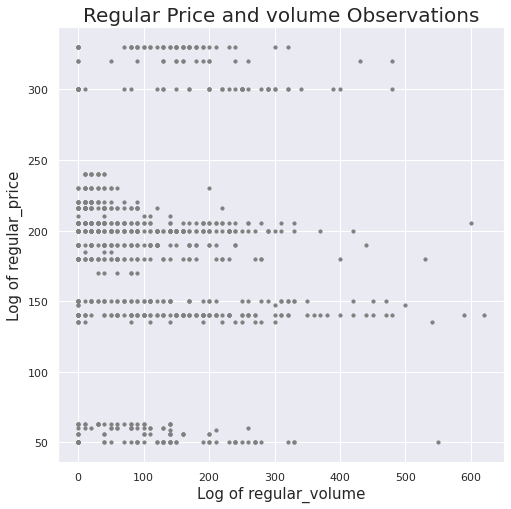

In [ ]:
sns.set()
fig_static = plt.figure(figsize = (8,8))
plt.scatter(data['regular_volume'],data['regular_price'], s = 10, c = 'gray')
plt.ylabel('Log of regular_price', fontsize = 15)
plt.xlabel('Log of regular_volume', fontsize = 15)
plt.title('Regular Price and volume Observations', fontsize = 20)
plt.show()

In [ ]:
df['promo_price'] = df['promo_price'].astype(float)
print(df.dtypes)

date_week          object
sku_cde             int64
cost_price        float64
regular_price     float64
regular_volume    float64
promo_price       float64
promo_volume      float64
dtype: object


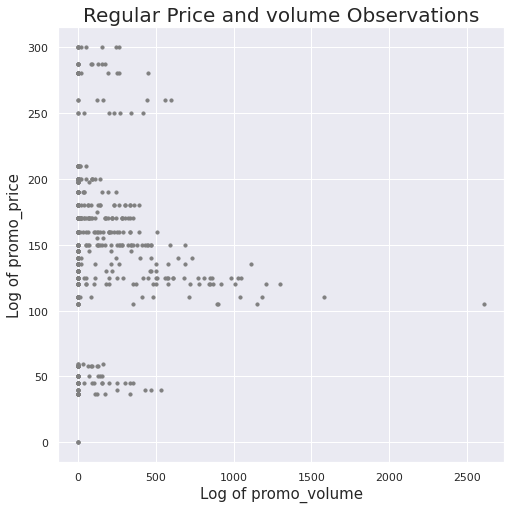

In [ ]:
sns.set()
fig_static = plt.figure(figsize = (8,8))
plt.scatter(data['promo_volume'],data['promo_price'], s = 10, c = 'gray')
plt.ylabel('Log of promo_price', fontsize = 15)
plt.xlabel('Log of promo_volume', fontsize = 15)
plt.title('Regular Price and volume Observations', fontsize = 20)
plt.show()

In [ ]:
df

date_week    sku_cde  cost_price  regular_price  regular_volume  \
0    2020-02-09   62875832        68.0          140.0            10.0   
1    2020-02-09   84630314       180.0          300.0            10.0   
2    2020-02-09   95208654        26.0           56.0            40.0   
3    2020-02-09  111708109        80.0           56.0             0.0   
4    2020-02-16   73267284        94.0          205.0            20.0   
..          ...        ...         ...            ...             ...   
846  2022-02-13   73267284        95.0          216.0            40.0   
847  2022-02-13   84630314       199.0          330.0            70.0   
848  2022-02-13   95208654        42.0           60.0            20.0   
849  2022-02-13  111708109        98.0          185.0            10.0   
850  2022-02-13   62875832        78.0          140.0            90.0   

     promo_price  promo_volume  
0           0.00           0.0  
1           0.00           0.0  
2           0.00           0.0  
3         109.95          10.0  
4         109.95           0.0  
..           ...           ...  
846       169.95           0.0  
847       169.95           0.0  
848       169.95           0.0  
849       169.95           0.0  
850       169.95           0.0  

[851 rows x 7 columns]

**Building a linear regression model to estimate Price Elasticity of Demand (PED), and also using  Python’s Statsmodels to estimate our models as well as conduct statistical tests, and data exploration**

In [ ]:
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

Ordinary Least Squares (OLS) Estimation for **(regular volume and regular price)**

In [ ]:
ls_model = ols("regular_volume ~ regular_price", data=df).fit()
print(ls_model.summary())

                            OLS Regression Results                            
Dep. Variable:         regular_volume   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.007623
Date:                Tue, 05 Jul 2022   Prob (F-statistic):              0.930
Time:                        16:01:42   Log-Likelihood:                -5221.4
No. Observations:                 851   AIC:                         1.045e+04
Df Residuals:                     849   BIC:                         1.046e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       108.5183     10.685     10.156

**Observations**


*   Low value for R-Squared explains that our model did not show good response variability
*   The small P-value shows that we can disregard the **null hypothes** is that price has no effect on Quantity sold, that means price have some appreciable effect on Quantity sold for the reqular quantity



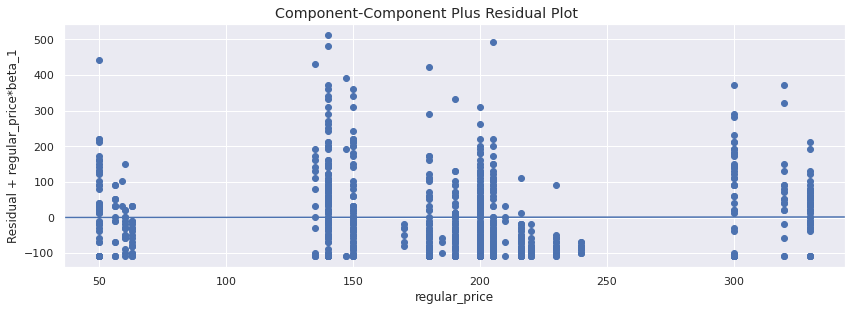

In [ ]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(ls_model, fig=fig)

The trend indicates that the predictor variables (Price) provides information about the response (Quantity sold at regular price), and some of the  data points fall further from the regression line and some are close to the regression line, and the predictions are not very precise

Ordinary Least Squares (OLS) Estimation for **(promo volume and promo price)**

In [ ]:
ls1_model = ols("promo_volume ~ promo_price", data=df).fit()
print(ls1_model.summary())

                            OLS Regression Results                            
Dep. Variable:           promo_volume   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.179
Date:                Tue, 05 Jul 2022   Prob (F-statistic):             0.0412
Time:                        16:01:50   Log-Likelihood:                -5803.7
No. Observations:                 851   AIC:                         1.161e+04
Df Residuals:                     849   BIC:                         1.162e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     131.4062     21.013      6.254      

The promo_price[T.104.95] give the lowest value for P values indicating that the promo price has the highest effect on  (promo_volume - Quantity sold) at promo price at promo_price[T.104.95]

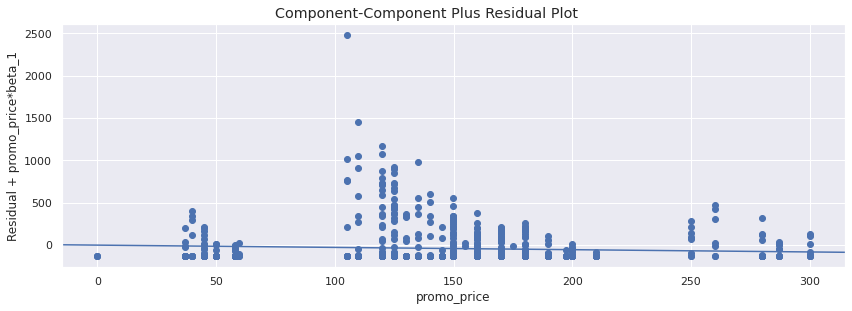

In [ ]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(ls1_model, fig=fig)

In [ ]:
pip install botocore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install ibm_boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement ibm_boto3 (from versions: none)
ERROR: No matching distribution found for ibm_boto3


In [ ]:
x = df['promo_price']
x

0        0.00
1        0.00
2        0.00
3      109.95
4      109.95
        ...  
846    169.95
847    169.95
848    169.95
849    169.95
850    169.95
Name: promo_price, Length: 851, dtype: float64

In [ ]:
y = df['promo_volume']
y

0       0.0
1       0.0
2       0.0
3      10.0
4       0.0
       ... 
846     0.0
847     0.0
848     0.0
849     0.0
850     0.0
Name: promo_volume, Length: 851, dtype: float64

**Price elasticity of demand measures the relative percentage change in Quantity**

*   Price elasticity of demand measures the relative percentage change in Quantity of a good and services in relative to percentage change in price of the goods and services.
*   Price elasticities of demand are always negative since price and quantity
demanded always move in opposite directions (on the demand curve). By
convention, we always talk about elasticities as positive numbers. Mathematically, we take the absolute value of the result.
*   An elastic demand is one in which the change in quantity demanded due to a change in price is large. An inelastic demand is one in which the change in quantity demanded due to a change in price is small





In [ ]:
df_demand_schedule= pd.DataFrame(data=df)
df_demand_schedule

date_week    sku_cde  cost_price  regular_price  regular_volume  \
0    2020-02-09   62875832        68.0          140.0            10.0   
1    2020-02-09   84630314       180.0          300.0            10.0   
2    2020-02-09   95208654        26.0           56.0            40.0   
3    2020-02-09  111708109        80.0           56.0             0.0   
4    2020-02-16   73267284        94.0          205.0            20.0   
..          ...        ...         ...            ...             ...   
846  2022-02-13   73267284        95.0          216.0            40.0   
847  2022-02-13   84630314       199.0          330.0            70.0   
848  2022-02-13   95208654        42.0           60.0            20.0   
849  2022-02-13  111708109        98.0          185.0            10.0   
850  2022-02-13   62875832        78.0          140.0            90.0   

     promo_price  promo_volume  
0           0.00           0.0  
1           0.00           0.0  
2           0.00           0.0  
3         109.95          10.0  
4         109.95           0.0  
..           ...           ...  
846       169.95           0.0  
847       169.95           0.0  
848       169.95           0.0  
849       169.95           0.0  
850       169.95           0.0  

[851 rows x 7 columns]

In [ ]:
df_demand_schedule['Price_Elasticity_of_Demand for regular']=(df_demand_schedule.regular_volume.pct_change() / df_demand_schedule.regular_price.pct_change())
df_demand_schedule

date_week    sku_cde  cost_price  regular_price  regular_volume  \
0    2020-02-09   62875832        68.0          140.0            10.0   
1    2020-02-09   84630314       180.0          300.0            10.0   
2    2020-02-09   95208654        26.0           56.0            40.0   
3    2020-02-09  111708109        80.0           56.0             0.0   
4    2020-02-16   73267284        94.0          205.0            20.0   
..          ...        ...         ...            ...             ...   
846  2022-02-13   73267284        95.0          216.0            40.0   
847  2022-02-13   84630314       199.0          330.0            70.0   
848  2022-02-13   95208654        42.0           60.0            20.0   
849  2022-02-13  111708109        98.0          185.0            10.0   
850  2022-02-13   62875832        78.0          140.0            90.0   

     promo_price  promo_volume  Price_Elasticity_of_Demand for regular  
0           0.00           0.0                                     NaN  
1           0.00           0.0                                0.000000  
2           0.00           0.0                               -3.688525  
3         109.95          10.0                                    -inf  
4         109.95           0.0                                     inf  
..           ...           ...                                     ...  
846       169.95           0.0                              -10.000000  
847       169.95           0.0                                1.421053  
848       169.95           0.0                                0.873016  
849       169.95           0.0                               -0.240000  
850       169.95           0.0                              -32.888889  

[851 rows x 8 columns]

In [ ]:
from google.colab import files
df_demand_schedule.to_excel('X.xlsx')
files.download('X.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   date_week                               851 non-null    object 
 1   sku_cde                                 851 non-null    int64  
 2   cost_price                              851 non-null    float64
 3   regular_price                           851 non-null    float64
 4   regular_volume                          851 non-null    float64
 5   promo_price                             851 non-null    float64
 6   promo_volume                            851 non-null    float64
 7   Price_Elasticity_of_Demand for regular  799 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 53.3+ KB


In [ ]:
df['promo_price'] = df['promo_price'].astype(float)
print(df.dtypes)

date_week                                  object
sku_cde                                     int64
cost_price                                float64
regular_price                             float64
regular_volume                            float64
promo_price                               float64
promo_volume                              float64
Price_Elasticity_of_Demand for regular    float64
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   date_week                               851 non-null    object 
 1   sku_cde                                 851 non-null    int64  
 2   cost_price                              851 non-null    float64
 3   regular_price                           851 non-null    float64
 4   regular_volume                          851 non-null    float64
 5   promo_price                             851 non-null    float64
 6   promo_volume                            851 non-null    float64
 7   Price_Elasticity_of_Demand for regular  799 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 53.3+ KB


In [ ]:
df_demand_schedule['Price_Elasticity_of_Demand for promo']=(df_demand_schedule.promo_volume.pct_change() / df_demand_schedule.promo_price.pct_change())
df_demand_schedule

date_week    sku_cde  cost_price  regular_price  regular_volume  \
0    2020-02-09   62875832        68.0          140.0            10.0   
1    2020-02-09   84630314       180.0          300.0            10.0   
2    2020-02-09   95208654        26.0           56.0            40.0   
3    2020-02-09  111708109        80.0           56.0             0.0   
4    2020-02-16   73267284        94.0          205.0            20.0   
..          ...        ...         ...            ...             ...   
846  2022-02-13   73267284        95.0          216.0            40.0   
847  2022-02-13   84630314       199.0          330.0            70.0   
848  2022-02-13   95208654        42.0           60.0            20.0   
849  2022-02-13  111708109        98.0          185.0            10.0   
850  2022-02-13   62875832        78.0          140.0            90.0   

     promo_price  promo_volume  Price_Elasticity_of_Demand for regular  \
0           0.00           0.0                                     NaN   
1           0.00           0.0                                0.000000   
2           0.00           0.0                               -3.688525   
3         109.95          10.0                                    -inf   
4         109.95           0.0                                     inf   
..           ...           ...                                     ...   
846       169.95           0.0                              -10.000000   
847       169.95           0.0                                1.421053   
848       169.95           0.0                                0.873016   
849       169.95           0.0                               -0.240000   
850       169.95           0.0                              -32.888889   

     Price_Elasticity_of_Demand for promo  
0                                     NaN  
1                                     NaN  
2                                     NaN  
3                                     NaN  
4                                    -inf  
..                                    ...  
846                                   NaN  
847                                   NaN  
848                                   NaN  
849                                   NaN  
850                                   NaN  

[851 rows x 9 columns]

In [ ]:
from google.colab import files
df_demand_schedule.to_excel('X.xlsx')
files.download('X.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data["Price_Elasticity_of_Demand for regular"].fillna("0", inplace = True)

In [ ]:
data["Price_Elasticity_of_Demand for promo"].fillna("0", inplace = True)

In [ ]:
df_demand_schedule

date_week    sku_cde  cost_price  regular_price  regular_volume  \
0    2020-02-09   62875832        68.0          140.0            10.0   
1    2020-02-09   84630314       180.0          300.0            10.0   
2    2020-02-09   95208654        26.0           56.0            40.0   
3    2020-02-09  111708109        80.0           56.0             0.0   
4    2020-02-16   73267284        94.0          205.0            20.0   
..          ...        ...         ...            ...             ...   
846  2022-02-13   73267284        95.0          216.0            40.0   
847  2022-02-13   84630314       199.0          330.0            70.0   
848  2022-02-13   95208654        42.0           60.0            20.0   
849  2022-02-13  111708109        98.0          185.0            10.0   
850  2022-02-13   62875832        78.0          140.0            90.0   

     promo_price  promo_volume Price_Elasticity_of_Demand for regular  \
0           0.00           0.0                                      0   
1           0.00           0.0                                    0.0   
2           0.00           0.0                              -3.688525   
3         109.95          10.0                                   -inf   
4         109.95           0.0                                    inf   
..           ...           ...                                    ...   
846       169.95           0.0                                  -10.0   
847       169.95           0.0                               1.421053   
848       169.95           0.0                               0.873016   
849       169.95           0.0                                  -0.24   
850       169.95           0.0                             -32.888889   

    Price_Elasticity_of_Demand for promo  
0                                      0  
1                                      0  
2                                      0  
3                                      0  
4                                   -inf  
..                                   ...  
846                                    0  
847                                    0  
848                                    0  
849                                    0  
850                                    0  

[851 rows x 9 columns]

In [ ]:
df_demand_schedule.describe()

sku_cde  cost_price  regular_price  regular_volume  promo_price  \
count  8.510000e+02  851.000000     851.000000      851.000000   851.000000   
mean   7.545326e+07   94.408931     183.565217      109.388954   149.020106   
std    4.223877e+07   42.363465      70.669281      111.862743    57.899396   
min    1.199078e+07   14.000000      50.000000        0.000000     0.000000   
25%    6.287583e+07   74.000000     140.000000       15.000000   125.000000   
50%    8.463031e+07   92.000000     200.000000       80.000000   149.950000   
75%    1.117081e+08   99.000000     205.000000      170.000000   169.960000   
max    1.373537e+08  210.000000     330.000000      620.000000   299.950000   

       promo_volume  Price_Elasticity_of_Demand for regular  \
count    851.000000                              799.000000   
mean      91.363102                                     NaN   
std      222.298207                                     NaN   
min        0.000000                                    -inf   
25%        0.000000                              -50.625000   
50%        0.000000                               -0.529412   
75%       60.000000                                1.328196   
max     2610.000000                                     inf   

       Price_Elasticity_of_Demand for promo  
count                            412.000000  
mean                                    NaN  
std                                     NaN  
min                                    -inf  
25%                                     NaN  
50%                                     NaN  
75%                                2.767521  
max                                     inf

To download the table above

In [ ]:
from google.colab import files
df_demand_schedule.to_excel('X.xlsx')
files.download('X.xlsx')

Casting the required Feautures

In [ ]:
list_features=['date_week','sku_cde','Price_Elasticity_of_Demand for regular','Price_Elasticity_of_Demand for promo']
list_features

['date_week',
 'sku_cde',
 'Price_Elasticity_of_Demand for regular',
 'Price_Elasticity_of_Demand for promo']

In [ ]:
X=df[list_features]
X

date_week    sku_cde Price_Elasticity_of_Demand for regular  \
0    2020-02-09   62875832                                      0   
1    2020-02-09   84630314                                    0.0   
2    2020-02-09   95208654                              -3.688525   
3    2020-02-09  111708109                                   -inf   
4    2020-02-16   73267284                                    inf   
..          ...        ...                                    ...   
846  2022-02-13   73267284                                  -10.0   
847  2022-02-13   84630314                               1.421053   
848  2022-02-13   95208654                               0.873016   
849  2022-02-13  111708109                                  -0.24   
850  2022-02-13   62875832                             -32.888889   

    Price_Elasticity_of_Demand for promo  
0                                      0  
1                                      0  
2                                      0  
3                                      0  
4                                   -inf  
..                                   ...  
846                                    0  
847                                    0  
848                                    0  
849                                    0  
850                                    0  

[851 rows x 4 columns]



*   if the price elasticity of demand is greater than 1 it is elastic, then the company should cut the price, because the percentage drop in price will result in an even larger percentage increase in the quantity sold.
However
*  if the price elasticity of demand is lesser than 1 it is inelastic



To download the table above

In [ ]:
from google.colab import files
X.to_excel('X.xlsx')
files.download('X.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show>

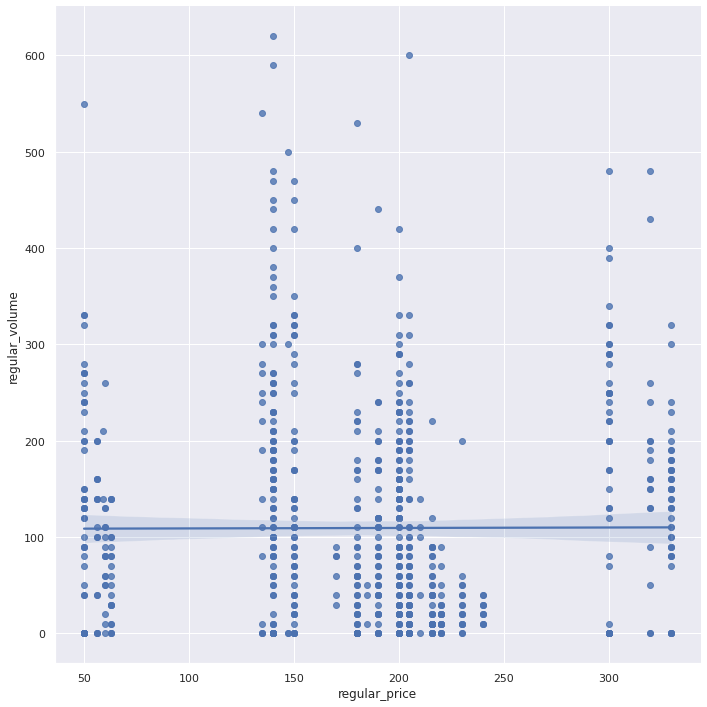

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df,kind ='reg', size=10,x_vars=['regular_price'],y_vars=['regular_volume'])
plt.show

<function matplotlib.pyplot.show>

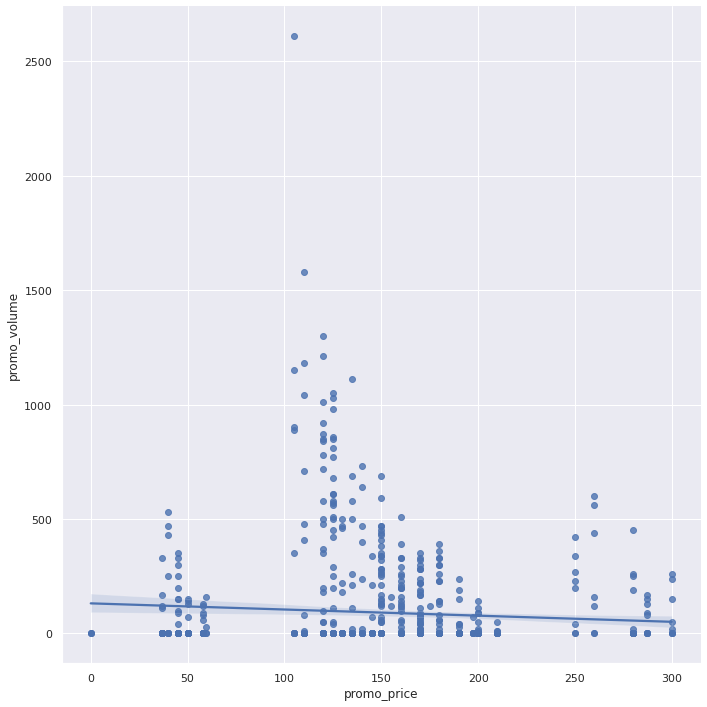

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df,kind ='reg', size=10,x_vars=['promo_price'],y_vars=['promo_volume'])
plt.show

In [ ]:
#Format and build a dataframe with x_values for each product within the caregory
x_pivot = df.pivot(index= 'date_week' ,columns='sku_cde' ,values='regular_price')
x_values = pd.DataFrame(x_pivot.to_records())
print(x_values)

      date_week  11990782  12062063  62875832  73267284  84630314  95208654  \
0    2020-02-09       NaN       NaN     140.0       NaN     300.0      56.0   
1    2020-02-16     300.0     300.0     140.0     205.0     300.0      56.0   
2    2020-02-23     300.0     205.0     140.0     205.0     300.0      56.0   
3    2020-03-01     205.0     300.0     140.0     205.0     300.0      56.0   
4    2020-03-08     205.0     205.0     140.0     205.0     300.0      50.0   
5    2020-03-15     180.0     200.0     140.0     205.0     300.0      50.0   
6    2020-03-22     180.0     200.0     140.0     205.0     300.0     200.0   
7    2020-03-29     180.0     200.0     140.0     205.0     300.0     140.0   
8    2020-04-05     180.0     200.0     140.0       NaN     300.0     180.0   
9    2020-04-12     180.0     200.0     140.0       NaN     300.0      50.0   
10   2020-04-19     180.0     200.0     140.0       NaN     300.0      50.0   
11   2020-04-26     180.0     200.0     300.0     20

In [ ]:

#Format and build a dataframe with y_values for each product within the caregory
y_pivot = df.pivot( index = 'date_week',columns='sku_cde', values='regular_volume')
y_values = pd.DataFrame(y_pivot.to_records())
print(y_values)

      date_week  11990782  12062063  62875832  73267284  84630314  95208654  \
0    2020-02-09       NaN       NaN      10.0       NaN      10.0      40.0   
1    2020-02-16       0.0       0.0      50.0      20.0     290.0     200.0   
2    2020-02-23       0.0       0.0     100.0      40.0     300.0     160.0   
3    2020-03-01       0.0       0.0     110.0      90.0     240.0     140.0   
4    2020-03-08       0.0       0.0     150.0     240.0     280.0     120.0   
5    2020-03-15     530.0     230.0     150.0     600.0     320.0     150.0   
6    2020-03-22     400.0     330.0     350.0      90.0     250.0       0.0   
7    2020-03-29     280.0     120.0     170.0      50.0      70.0       0.0   
8    2020-04-05      90.0     200.0     110.0       NaN     170.0       0.0   
9    2020-04-12     210.0     190.0      40.0       NaN     250.0     130.0   
10   2020-04-19     230.0     300.0       0.0       NaN     200.0     280.0   
11   2020-04-26     270.0     120.0       0.0      3

In [ ]:

points = []
results_values = {
    "name": [],
    "price_elasticity": [],
    "price_mean": [],
    "quantity_mean": [],
    "intercept": [],
    "t_score":[],
    "slope": [],
    "coefficient_pvalue" : [],
}
#Append x_values with y_values per same product name
for column in x_values.columns[1:]:
    column_points = []
    for i in range(len(x_values[column])):
        if not np.isnan(x_values[column][i]) and not np.isnan(y_values[column][i]):
            column_points.append((x_values[column][i], y_values[column][i]))
    df = pd.DataFrame(list(column_points), columns= ['x_value', 'y_value'])


    #Linear Regression Model
    import statsmodels.api as sm
    x_value = df['x_value']
    y_value = df['y_value']
    X = sm.add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()


    #(Null Hypothesis test) Coefficient with a p value less than 0.05
    if result.f_pvalue < 0.05:


        coefficient_pvalue = result.f_pvalue
        intercept, slope = result.params
        mean_price = np.mean(x_value)
        mean_quantity = np.mean(y_value)
        tintercept, t_score = result.tvalues



        #Price elasticity Formula
        price_elasticity = (slope)*(mean_price/mean_quantity)

        #Append results into dictionary for dataframe
        results_values["name"].append(column)
        results_values["price_elasticity"].append(price_elasticity)
        results_values["price_mean"].append(mean_price)
        results_values["quantity_mean"].append(mean_quantity)
        results_values["intercept"].append(intercept)
        results_values['t_score'].append(t_score)
        results_values["slope"].append(slope)
        results_values["coefficient_pvalue"].append(coefficient_pvalue)

final_df = pd.DataFrame.from_dict(results_values)
df_elasticity = final_df[['name','price_elasticity','t_score','coefficient_pvalue','slope','price_mean','quantity_mean','intercept']]


In [ ]:
df_elasticity

name  price_elasticity   t_score  coefficient_pvalue     slope  \
0   84630314          1.777195  6.259393        8.777306e-09  0.984314   
1   95208654         -0.634810 -6.168754        1.336817e-08 -0.903492   
2  111708109         -1.660926 -4.061980        9.457165e-05 -1.204485   

   price_mean  quantity_mean   intercept  
0  293.311321     162.452830 -126.257494  
1   78.481132     111.698113  182.605211  
2  163.783019     118.773585  316.047725

In [ ]:
from google.colab import files
df_elasticity.to_excel('X.xlsx')
files.download('X.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



1.  t_score: equals to t-stats, which indicates the significance of the findings. The closer is to 0, the more likely there is no significance. The greater the t-stats, whether positive or negative, the greater the significance of the findings
2.   coefficient_pvalue:As stated earlier,  tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis
3.  slope (coefficient):is the ratio of the “price change” to the “quantity sold change” between (any) two distinct points on a line
4.  price_mean: average price per product
5. quantity_mean: average quantity sold per product
6. intercept: equals the quantity of X when all other variables = 0





**Data Visualization: Divergent Plot for Price Elasticities:**

In [ ]:
def divergent_plot(df, values_column, ylabel, xlabel):

    #Divergent plot
    df['ranking'] = df[values_column].rank( ascending = True).astype(int)
    df.sort_values(values_column, ascending =False, inplace = True)
    plt.figure(figsize = (12,5), dpi = 80)
    plt.hlines(y = df['ranking'] , xmin = 0, xmax = df[values_column], alpha = 0.5, linewidth = 3)

    #Add elasticity labels
    for x, y, tex in zip(df[values_column], df['ranking'] , df[values_column]):
        plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left',
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':10})


    # Axis and title
    plt.gca().set(ylabel= ylabel, xlabel= xlabel)
    plt.yticks(df['ranking'])
    plt.title(values_column , fontdict={'size':13})
    plt.grid(linestyle='--', alpha=0.5)
    plt.show()


    #Adjust Ranking column and print dataframe
    pd.set_option('display.width', 4000)
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]

    df = df.iloc[:,:3]
    df.set_index('ranking', inplace=True)
    display(df)

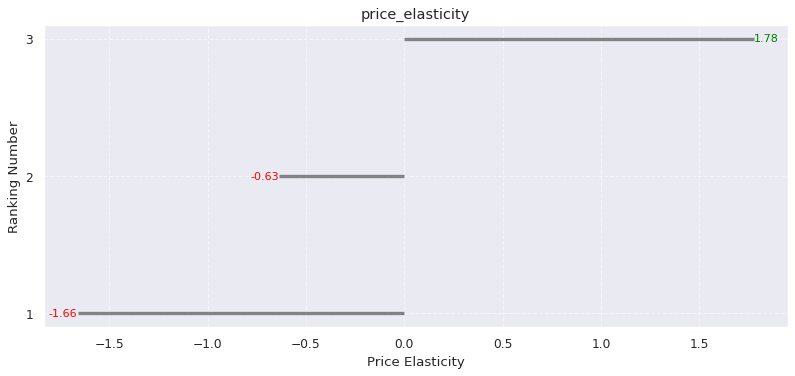

TypeError: ignored

In [ ]:
pe_plot = divergent_plot(df_elasticity, 'price_elasticity', 'Ranking Number', 'Price Elasticity')

In [ ]:

#Format and build a dataframe with x_values for each product within the caregory
x_pivot = df.pivot(index= 'date_week' ,columns='sku_cde' ,values='promo_price')
x_values = pd.DataFrame(x_pivot.to_records())
print(x_values)

      date_week  11990782  12062063  62875832  73267284  84630314  95208654  \
0    2020-02-09       NaN       NaN      0.00       NaN      0.00      0.00   
1    2020-02-16    149.95    169.95    109.95    109.95    109.95    109.95   
2    2020-02-23    149.95    149.95    149.95    109.95    149.95    109.95   
3    2020-03-01    149.95    149.95    149.95    149.95    149.95    149.95   
4    2020-03-08    149.95    149.95    149.95    149.95    149.95    149.95   
5    2020-03-15    149.95    149.95    149.95    149.95    149.95     36.95   
6    2020-03-22     36.95     36.95     36.95     36.95     36.95     36.95   
7    2020-03-29     36.95     36.95     36.95     36.95     36.95     36.95   
8    2020-04-05    104.95    104.95    104.95       NaN    104.95     36.95   
9    2020-04-12    104.95     36.95    119.95       NaN     36.95    104.95   
10   2020-04-19    119.95    119.95    119.95       NaN    119.95    119.95   
11   2020-04-26    119.95    119.95    119.95    119

In [ ]:
#Format and build a dataframe with y_values for each product within the caregory
y_pivot = df.pivot( index = 'date_week',columns='sku_cde', values='promo_volume')
y_values = pd.DataFrame(y_pivot.to_records())
print(y_values)

      date_week  11990782  12062063  62875832  73267284  84630314  95208654  \
0    2020-02-09       NaN       NaN       0.0       NaN       0.0       0.0   
1    2020-02-16     150.0     350.0       0.0       0.0       0.0       0.0   
2    2020-02-23     280.0     470.0       0.0       0.0       0.0       0.0   
3    2020-03-01     210.0     450.0       0.0       0.0       0.0       0.0   
4    2020-03-08     440.0     380.0       0.0       0.0       0.0       0.0   
5    2020-03-15      50.0      50.0       0.0       0.0       0.0     120.0   
6    2020-03-22       0.0       0.0       0.0       0.0       0.0     330.0   
7    2020-03-29       0.0       0.0       0.0       0.0       0.0     110.0   
8    2020-04-05       0.0       0.0       0.0       NaN       0.0     170.0   
9    2020-04-12       0.0       0.0     180.0       NaN       0.0       0.0   
10   2020-04-19       0.0       0.0     580.0       NaN       0.0       0.0   
11   2020-04-26       0.0       0.0     780.0       

In [ ]:
points = []
results_values = {
    "name": [],
    "price_elasticity": [],
    "price_mean": [],
    "quantity_mean": [],
    "intercept": [],
    "t_score":[],
    "slope": [],
    "coefficient_pvalue" : [],
}
#Append x_values with y_values per same product name
for column in x_values.columns[1:]:
    column_points = []
    for i in range(len(x_values[column])):
        if not np.isnan(x_values[column][i]) and not np.isnan(y_values[column][i]):
            column_points.append((x_values[column][i], y_values[column][i]))
    df = pd.DataFrame(list(column_points), columns= ['x_value', 'y_value'])


    #Linear Regression Model
    import statsmodels.api as sm
    x_value = df['x_value']
    y_value = df['y_value']
    X = sm.add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()


    #(Null Hypothesis test) Coefficient with a p value less than 0.05
    if result.f_pvalue < 0.05:


        coefficient_pvalue = result.f_pvalue
        intercept, slope = result.params
        mean_price = np.mean(x_value)
        mean_quantity = np.mean(y_value)
        tintercept, t_score = result.tvalues



        #Price elasticity Formula
        price_elasticity = (slope)*(mean_price/mean_quantity)

        #Append results into dictionary for dataframe
        results_values["name"].append(column)
        results_values["price_elasticity"].append(price_elasticity)
        results_values["price_mean"].append(mean_price)
        results_values["quantity_mean"].append(mean_quantity)
        results_values["intercept"].append(intercept)
        results_values['t_score'].append(t_score)
        results_values["slope"].append(slope)
        results_values["coefficient_pvalue"].append(coefficient_pvalue)

final_df = pd.DataFrame.from_dict(results_values)
df_elasticity = final_df[['name','price_elasticity','t_score','coefficient_pvalue','slope','price_mean','quantity_mean','intercept']]

In [ ]:
df_elasticity

name  price_elasticity   t_score  coefficient_pvalue     slope  \
0   12062063          1.159298  2.505831        1.379765e-02  0.756912   
1   73267284          1.635794  2.226062        2.865579e-02  0.186803   
2   84630314          3.012776  7.187586        1.038288e-10  0.965855   
3   95208654         -2.166902 -7.255705        7.437737e-11 -0.929812   
4  111708109         -1.178595 -2.876936        4.873060e-03 -2.708259   

   price_mean  quantity_mean   intercept  
0  146.976250      95.961538  -15.286499  
1  160.038046      18.275862  -11.619686  
2  173.326226      55.566038 -111.841985  
3  127.736226      54.811321  173.582057  
4  137.904528     316.886792  690.367929

In [ ]:
def divergent_plot(df, values_column, ylabel, xlabel):

    #Divergent plot
    df['ranking'] = df[values_column].rank( ascending = True).astype(int)
    df.sort_values(values_column, ascending =False, inplace = True)
    plt.figure(figsize = (12,5), dpi = 80)
    plt.hlines(y = df['ranking'] , xmin = 0, xmax = df[values_column], alpha = 0.5, linewidth = 3)

    #Add elasticity labels
    for x, y, tex in zip(df[values_column], df['ranking'] , df[values_column]):
        plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left',
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':10})


    # Axis and title
    plt.gca().set(ylabel= ylabel, xlabel= xlabel)
    plt.yticks(df['ranking'])
    plt.title(values_column , fontdict={'size':13})
    plt.grid(linestyle='--', alpha=0.5)
    plt.show()


    #Adjust Ranking column and print dataframe
    pd.set_option('display.width', 4000)
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]

    df = df.iloc[:,:3]
    df.set_index('ranking', inplace=True)
    display(df)

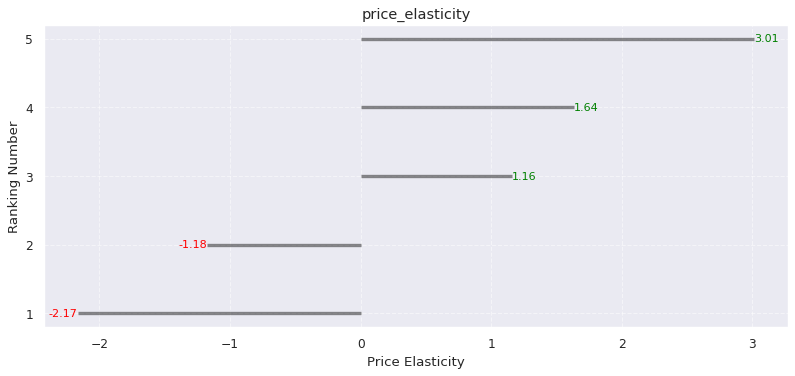

TypeError: ignored

In [ ]:
pe_plot = divergent_plot(df_elasticity, 'price_elasticity', 'Ranking Number', 'Price Elasticity')


**prompt user to give the values for quantity and price and print these values for user to verify**

In [ ]:



print('ALL INPUTS MUST BE NUMBERS')
while True:
    try:
        Q_initial=float(input('initial regular_volume and press enter:' ))
        Q_final=float(input('final regular_volume and press enter:' ))
        Q_change=[Q_initial,Q_final]
        Q_change=list(map(float,Q_change))

        P_initial=float(input('initial regular_price:' ))
        P_final=float(input('final regular_price:' ))
        P_change=[P_initial,P_final]
        P_change=list(map(float,P_change))

    except ValueError:
        print("Sorry, I didn't understand that.")
        continue
    else:
        break

print('\033[1m'+'Quantity sold at regular price and Quantity sold at promo price:{}'.format(Q_change))
print('Selling price of the item and DIscount Price of the item:{}'.format(P_change))

ALL INPUTS MUST BE NUMBERS
initial regular_volume and press enter:230
final regular_volume and press enter:530
initial regular_price:180
final promo_price:200
Quantity sold at regular price and Quantity sold at promo price:[230.0, 530.0]
Selling price of the item and DIscount Price of the item:[180.0, 200.0]


**Calculating Elasticity of Demand**

In [ ]:
# uses the formula for elasticity of demand to calculate value and return it as well as the elasticity type based on
#the absolute value of the elasticity

Price_Elasticity_demand =((Q_change[1]-Q_change[0])/Q_change[0]*100)/((P_change[1]-P_change[0])/P_change[0]*100)
print('value of elasticity:{}'.format(Price_Elasticity_demand ))
print('Absolute value:{}'.format(abs(Price_Elasticity_demand)))
if abs(Price_Elasticity_demand)< 1:
    print('Inelastic demand')
elif abs(Price_Elasticity_demand)== 1:
    print('Unit elastic demand')
else:
    print('\033[1m'+'Elastic demand')

value of elasticity:11.73913043478261
Absolute value:11.73913043478261
Elastic demand


In [ ]:
print('ALL INPUTS MUST BE NUMBERS')
while True:
    try:
        Q_initial=float(input('initial promo_volume and press enter:' ))
        Q_final=float(input('final promo_volume and press enter:' ))
        Q_change=[Q_initial,Q_final]
        Q_change=list(map(float,Q_change))

        P_initial=float(input('initial promo_price:' ))
        P_final=float(input('final promo_price:' ))
        P_change=[P_initial,P_final]
        P_change=list(map(float,P_change))

    except ValueError:
        print("Sorry, I didn't understand that.")
        continue
    else:
        break

print('\033[1m'+'Quantity sold at regular price and Quantity sold at promo price:{}'.format(Q_change))
print('Selling price of the item and DIscount Price of the item:{}'.format(P_change))

ALL INPUTS MUST BE NUMBERS
initial promo_volume and press enter:1150
final promo_volume and press enter:50
initial promo_price:104.95
final promo_price:149.95
Quantity sold at regular price and Quantity sold at promo price:[1150.0, 50.0]
Selling price of the item and DIscount Price of the item:[104.95, 149.95]


In [ ]:
# uses the formula for elasticity of demand to calculate value and return it as well as the elasticity type based on
#the absolute value of the elasticity

Price_Elasticity_demand =((Q_change[1]-Q_change[0])/Q_change[0]*100)/((P_change[1]-P_change[0])/P_change[0]*100)
print('value of elasticity:{}'.format(Price_Elasticity_demand ))
print('Absolute value:{}'.format(abs(Price_Elasticity_demand)))
if abs(Price_Elasticity_demand)< 1:
    print('Inelastic demand')
elif abs(Price_Elasticity_demand)== 1:
    print('Unit elastic demand')
else:
    print('\033[1m'+'Elastic demand')

value of elasticity:-2.2308212560386482
Absolute value:2.2308212560386482
Elastic demand
